# ***Simulating 2D Ising Model using Metropolis algorithm***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [1]:
using Plots, ProgressMeter, JLD, Statistics

include("Q1-Ising2D.jl")

figpath = "../../Figs/Q1/"
datapath = "../../Data/Q1/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

In [10]:
PTData = load(datapath * "PTData.jld")
Llist = PTData["Llist"]
βList = PTData["βList"]

75×1 Matrix{Float64}:
 0.0
 0.02
 0.04
 0.06
 0.08
 0.1
 0.12
 0.14
 0.16
 0.18
 0.2
 0.22
 0.24
 ⋮
 0.78
 0.8
 0.82
 0.84
 0.86
 0.88
 0.9
 0.92
 0.94
 0.96
 0.98
 1.0

In [11]:
MeanData = zeros(4, length(βList), length(Llist))
EbarData = zeros(4, length(βList), length(Llist))
for i ∈ 1:length(βList)
    for l ∈ 1:length(Llist)
        MeanData[1, i, l] = mean(Data[1, i, :, l])
        MeanData[2, i, l] = mean(Data[2, i, :, l])
        MeanData[3, i, l] = mean(Data[3, i, :, l])
        MeanData[4, i, l] = mean(Data[4, i, :, l])
        EbarData[1, i, l] = std(Data[1, i, :, l])
        EbarData[2, i, l] = std(Data[2, i, :, l])
        EbarData[3, i, l] = std(Data[3, i, :, l])
        EbarData[4, i, l] = std(Data[4, i, :, l])
    end
end

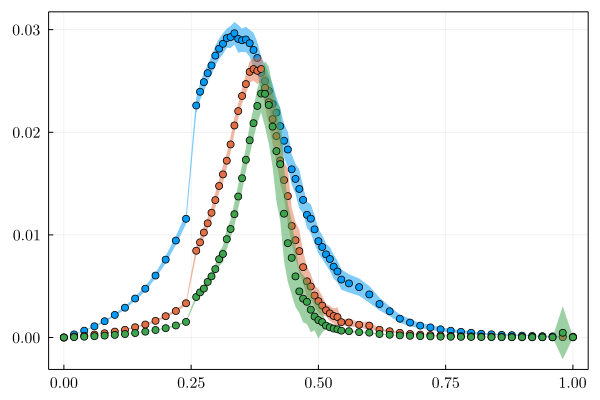

In [19]:
PTplot1 = begin
    scatter(βList, MeanData[1, :, 1], ribbon = EbarData[1, :, 1])
    scatter!(βList, MeanData[1, :, 2], ribbon = EbarData[1, :, 2])
    scatter!(βList, MeanData[1, :, 3], ribbon = EbarData[1, :, 3])
end
PTplot2 = begin
    scatter(βList, MeanData[2, :, 1], ribbon = EbarData[2, :, 1])
    scatter!(βList, MeanData[2, :, 2], ribbon = EbarData[2, :, 2])
    scatter!(βList, MeanData[2, :, 3], ribbon = EbarData[2, :, 3])
end
PTplot3 = begin
    scatter(βList, MeanData[3, :, 1], ribbon = EbarData[3, :, 1])
    scatter!(βList, MeanData[3, :, 2], ribbon = EbarData[3, :, 2])
    scatter!(βList, MeanData[3, :, 3], ribbon = EbarData[3, :, 3])
end
PTplot4 = begin
    scatter(βList, MeanData[4, :, 1], ribbon = EbarData[4, :, 1])
    scatter!(βList, MeanData[4, :, 2], ribbon = EbarData[4, :, 2])
    scatter!(βList, MeanData[4, :, 3], ribbon = EbarData[4, :, 3])
end

In [26]:
TotEXPData = load(datapath * "EXPData.jld")
EXPData = TotEXPData["EXPData"]
βzoom = TotEXPData["βzoom"]
Llist = TotEXPData["Llist"]

17×1 Matrix{Int64}:
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20

In [32]:
l = 5
Mlist = []
Clist = []
χlist = []
for n ∈ 1:size(EXPData)[4]
    index3 = argmax(EXPData[3, :, l, n])
    index4 = argmax(EXPData[4, :, l, n])
    push!(Clist, (Llist[l]^2 * EXPData[3, index3, l, n], 1 / βzoom[index3]))
    push!(Mlist, (Llist[l]^2 * EXPData[2, index4, l, n], 1 / βzoom[index4]))
    push!(χlist, (Llist[l]^2 * EXPData[4, index4, l, n], 1 / βzoom[index4]))
end


In [86]:
AVGEXPData = zeros(length(Llist), 3, 2)
for l ∈ 1:length(Llist)
    Mlist = []
    Clist = []
    χlist = []
    for n ∈ 1:size(EXPData)[4]
        index3 = argmax(EXPData[3, :, l, n])
        index4 = argmax(EXPData[4, :, l, n])
        push!(Clist, (Llist[l]^2 * EXPData[3, index3, l, n], 1 / βzoom[index3]))
        push!(Mlist, (Llist[l]^2 * EXPData[2, index4, l, n], 1 / βzoom[index4]))
        push!(χlist, (Llist[l]^2 * EXPData[4, index4, l, n], 1 / βzoom[index4]))
    end
    AVGEXPData[l, 1, 1], AVGEXPData[l, 1, 2] = mean(getindex.(Mlist, 1)), mean(getindex.(Mlist, 2))
    AVGEXPData[l, 2, 1], AVGEXPData[l, 2, 2] = mean(getindex.(Clist, 1)), mean(getindex.(Clist, 2))
    AVGEXPData[l, 3, 1], AVGEXPData[l, 3, 2] = mean(getindex.(χlist, 1)), mean(getindex.(χlist, 2))
end

In [87]:
STDEXPData = zeros(length(Llist), 3, 2)
for l ∈ 1:length(Llist)
    Mlist = []
    Clist = []
    χlist = []
    for n ∈ 1:size(EXPData)[4]
        index3 = argmax(EXPData[3, :, l, n])
        index4 = argmax(EXPData[4, :, l, n])
        push!(Clist, (Llist[l]^2 * EXPData[3, index3, l, n], 1 / βzoom[index3]))
        push!(Mlist, (Llist[l]^2 * EXPData[2, index4, l, n], 1 / βzoom[index4]))
        push!(χlist, (Llist[l]^2 * EXPData[4, index4, l, n], 1 / βzoom[index4]))
    end
    STDEXPData[l, 1, 1], STDEXPData[l, 1, 2] = std(getindex.(Mlist, 1)), std(getindex.(Mlist, 2))
    STDEXPData[l, 2, 1], STDEXPData[l, 2, 2] = std(getindex.(Clist, 1)), std(getindex.(Clist, 2))
    STDEXPData[l, 3, 1], STDEXPData[l, 3, 2] = std(getindex.(χlist, 1)), std(getindex.(χlist, 2))
end

In [81]:
x = hcat(2.3:0.01:2.8)
y = abs.(3.7834333040453374 .- x) .^ 13.917693887640846

51×1 Matrix{Float64}:
 241.91118252218052
 220.17708639364685
 200.26722324730218
 182.03939936208337
 165.3616419941197
 150.111527519959
 136.17554955723668
 123.44852493643279
 111.83303549689188
 101.23890377571733
  91.5827007497912
  82.78728387899714
  74.7813637830014
   ⋮
   3.466564802932543
   3.0504654270845784
   2.6811304217552614
   2.3536678945108096
   2.0636589391605042
   1.807115717208464
   1.5804429102221815
   1.3804023002246244
   1.2040802506507562
   1.048857874995472
   0.9123836940588688
   0.7925485957035786

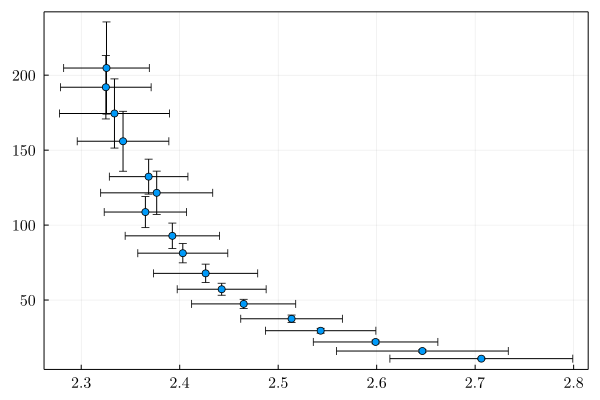

In [88]:
scatter(AVGEXPData[:, 1, 2], AVGEXPData[:, 1, 1], xerr = STDEXPData[:, 1, 2], yerr = STDEXPData[:, 1, 1])

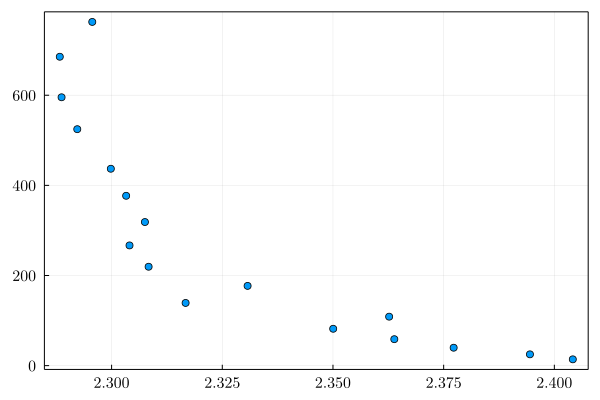

In [94]:
scatter(AVGEXPData[:, 2, 2], AVGEXPData[:, 2, 1])

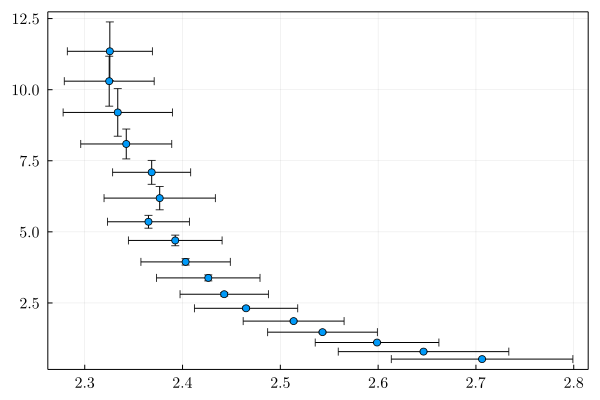

In [95]:
scatter(AVGEXPData[:, 3, 2], AVGEXPData[:, 3, 1], xerr = STDEXPData[:, 3, 2], yerr = STDEXPData[:, 3, 1])

In [75]:
using LsqFit
@. modelM(x, p) = (x - p[1])^(p[2])
fit = curve_fit(modelM, AVGEXPData[:, 1, 2], AVGEXPData[:, 1, 1], [4, 0.1])

LoadError: DomainError with -1.2937098616667435:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [91]:
@. modelX(x, p) = p[1] * abs(p[2] - x)^(-p[3])
fit = curve_fit(modelX, AVGEXPData[:, 2, 2], AVGEXPData[:, 2, 1], [0.1, 2.269, 7 / 4])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.008089693769045307, 2.165546014796957, 5.408234596920755], [4.742921536327488, -1.6197085692105233, -3.9511461269719987, -7.660115161847102, -6.397476530065944, -55.94423606234735, 82.4716324098193, -39.70956568550906, 81.94061070945864, 88.99435523067018, -7.537993678213638, -10.387318461324696, -16.27916084661865, 51.19301349074203, 76.00933695589731, -1.9253985505122273, -263.3153057413102], [2319.9625623728307 425.3602139668285 26.891830515766355; 2902.36753367808 554.6437177031512 34.61514027977497; … ; 84480.2013676102 30110.325056451045 1433.5345025104734; 61716.31640717026 20756.20865629145 1018.2725212744771], true, Float64[])

In [92]:
fit.param

3-element Vector{Float64}:
 0.008089693769045307
 2.165546014796957
 5.408234596920755